# 6.2 Exploring Relationship

## This script contain following points:

### 1. Import libraries and dataset

### 2. Create a correlation matrix heatmap

### 3. Create a scatterplot for the variables with the strongest correlations

### 4. Create a pair plot of the entire data set

### 5. Create a categorical plot and interpret the results

### 6. Answers to questions that can be based on the exploration conducted so far

### 7. Define any hypotheses

## 01. Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Data Immersion\Achieve 6\AirBnB in Europe cities Project'

In [4]:
# Import the dataset
airbnb = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_clean.pkl'))

In [5]:
airbnb.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm,weekday/weekend,city
0,296.159940,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193709,25.239380,71.608028,Weekday,Paris
1,288.237487,Private room,False,True,2.0,True,0,0,10.0,97.0,1,2.100005,0.107221,42.507907,58.791463,Weekday,Paris
2,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302325,0.234724,21.640840,53.051310,Weekday,Paris
3,298.956100,Entire home/apt,False,False,2.0,False,0,1,9.0,91.0,1,0.547567,0.195997,26.391291,70.463506,Weekday,Paris
4,247.926181,Entire home/apt,False,False,4.0,False,0,0,7.0,82.0,1,1.197921,0.103573,19.809165,62.918272,Weekday,Paris


In [6]:
# Drop unnecessary columns
airbnb_sub = airbnb.drop(columns = ['room_type','room_shared','room_private','host_is_superhost','multi_listing','business_listing',
                                   'weekday/weekend','city'])

In [7]:
airbnb_sub.head()

,price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm
0,296.159940,2.0,10.0,97.0,1,0.699821,0.193709,25.239380,71.608028
1,288.237487,2.0,10.0,97.0,1,2.100005,0.107221,42.507907,58.791463
2,211.343089,2.0,10.0,94.0,1,3.302325,0.234724,21.640840,53.051310
3,298.956100,2.0,9.0,91.0,1,0.547567,0.195997,26.391291,70.463506
4,247.926181,4.0,7.0,82.0,1,1.197921,0.103573,19.809165,62.918272


## 02. Create a correlation matrix heatmap

In [8]:
# Create a correlation matrix using pandas
airbnb_sub.corr()

,price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm
price,1.000000,0.203077,-0.006082,-0.001888,0.221653,-0.044725,-0.061025,0.292396,0.144094
person_capacity,0.203077,1.000000,0.003256,0.005181,0.560627,-0.128488,-0.037267,-0.050487,0.038059
cleanliness_rating,-0.006082,0.003256,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.075372,-0.005995
guest_satisfaction_overall,-0.001888,0.005181,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.074146,-0.008765
bedrooms,0.221653,0.560627,0.033489,0.047573,1.000000,-0.006262,0.044431,-0.063773,-0.057726
city_center_dist,-0.044725,-0.128488,-0.030202,-0.004178,-0.006262,1.000000,0.558064,-0.242862,-0.467791
metro_dist,-0.061025,-0.037267,0.010441,0.029788,0.044431,0.558064,1.000000,-0.219587,-0.259654
attr_index_norm,0.292396,-0.050487,-0.075372,-0.074146,-0.063773,-0.242862,-0.219587,1.000000,0.472143
rest_index_norm,0.144094,0.038059,-0.005995,-0.008765,-0.057726,-0.467791,-0.259654,0.472143,1.000000


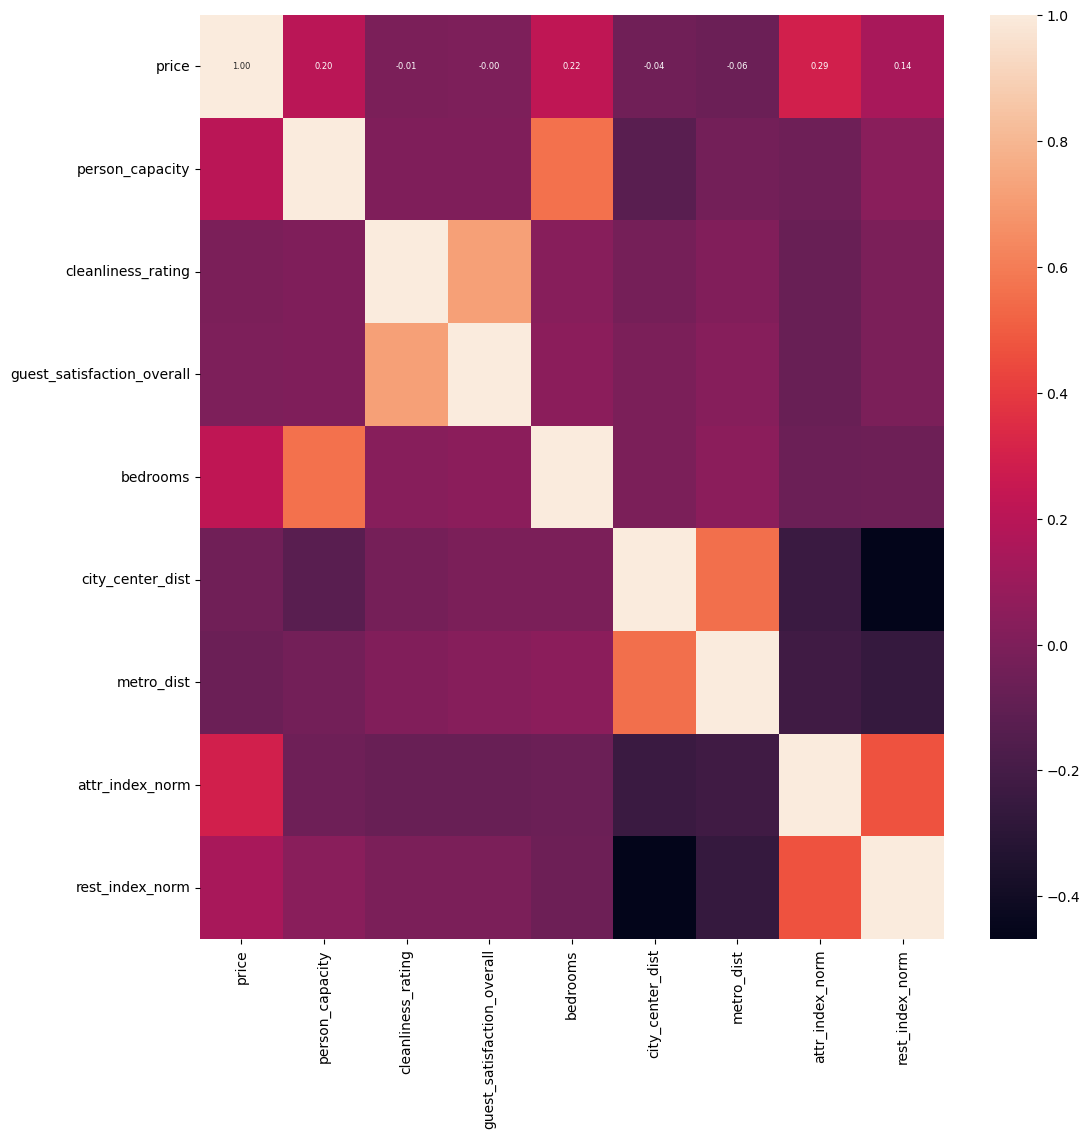

In [9]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(12, 12)) # Set a larger figure size
corr = sns.heatmap(airbnb_sub.corr(),
annot=True,
annot_kws={"size": 6}, # Adjust font size for annotations
fmt=".2f", # Display two decimal places
ax=ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

#### Price does not have any strong relationship with a particular variable. 
#### The correlation coefficient (0.203) is positive, indicating a weak positive relationship. This suggests that listings with a higher person capacity tend to be more expensive. The same goes for attr_index_norm (0.292), bedrooms (0.221) and rest_index_norm (0.144). This indicates that a listing near restaurants or attractions with more bedrooms tends to be more expensive.
#### The correlation coefficient (-0.061) is negative, indicating a weak negative relationship. This suggests that listings near metro stations tend to be more expensive. The same goes for city_center_dist (-0.04), cleanliness_rating (-0.006) and guest_satisfaction_overall (-0.002). This indicates that a highly rated, clean and near the city centre tends to be more expensive.

## 03. Create a scatterplot for the variables with the strongest correlations

### I will create scatterplot for further relationship analysis of these variables: attr_index_norm, bedrooms, person_capacity

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

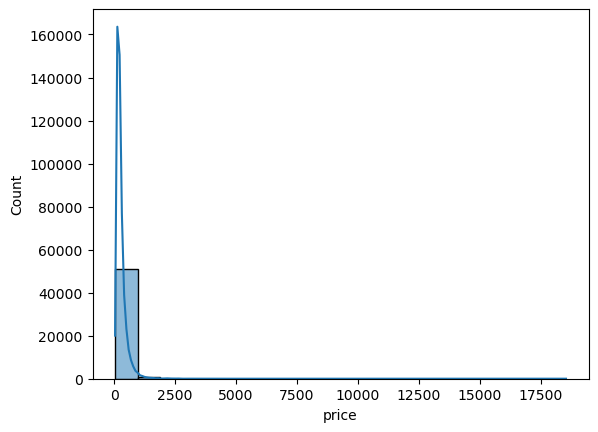

In [10]:
# Creating a histogram to see the distribution
sns.histplot(airbnb_sub['price'], bins = 20, kde = True)

# There are extreme values in price that make it hard to identify the relationship between variables, so I will set the limit for the y-axis (price axis)

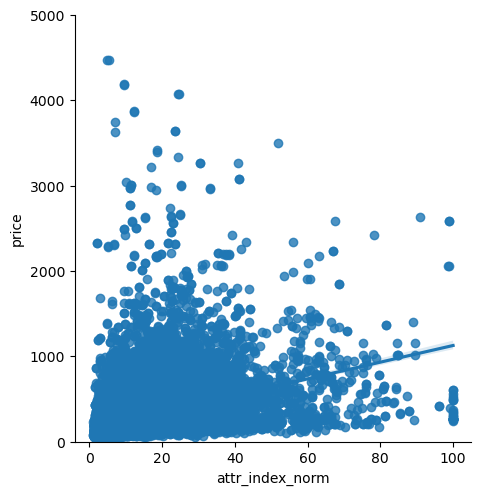

In [11]:
# Create a scatterplot for the "attr_index_norm" and "price" columns in seaborn
sns.lmplot(x = 'attr_index_norm', y = 'price', data = airbnb_sub)
# Limit the y-axis at 5000
plt.ylim(0, 5000)
plt.show()

#### Most data points are clustered towards the lower left side of the graph, indicating a concentration of lower prices associated with lower attribute index values.
#### A trend line suggests a weak correlation between “attr_index_norm” and “price.”

In [12]:
# Create a subset for low-price, middle-price and high price
airbnb_low = airbnb_sub[airbnb_sub['price'] <= 150]
airbnb_mid = airbnb_sub[(airbnb_sub['price'] > 150) & (airbnb_sub['price'] <= 500)]
airbnb_high = airbnb_sub[airbnb_sub['price'] > 500]


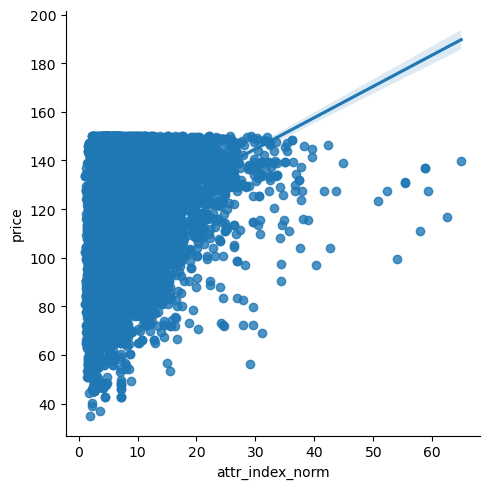

In [13]:
# Create a scatterplot for the "attr_index_norm" and "low price" columns in seaborn
sns.lmplot(x = 'attr_index_norm', y = 'price', data = airbnb_low)

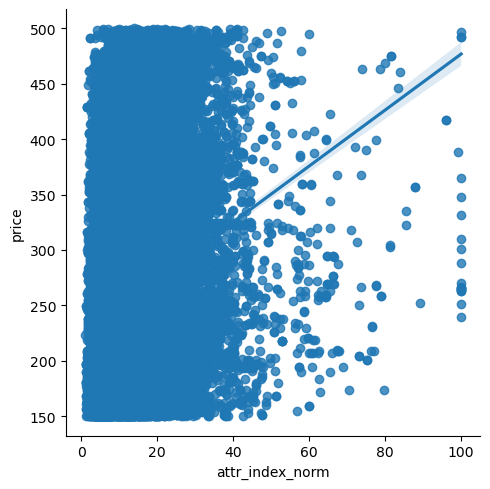

In [14]:
# Create a scatterplot for the "attr_index_norm" and "middle price" columns in seaborn
sns.lmplot(x = 'attr_index_norm', y = 'price', data = airbnb_mid)

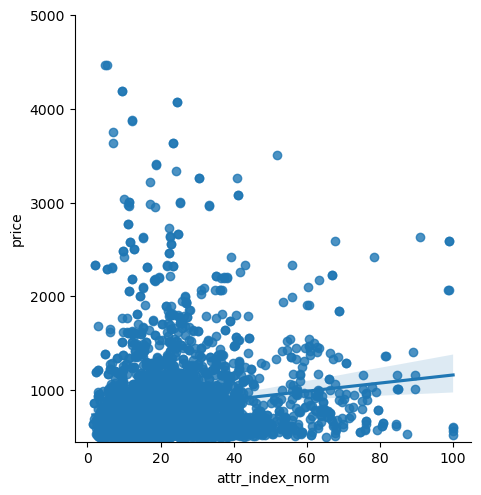

In [15]:
# Create a scatterplot for the "attr_index_norm" and "high price" columns in seaborn
sns.lmplot(x = 'attr_index_norm', y = 'price', data = airbnb_high)
# Limit the y-axis at 5000
plt.ylim(450, 5000)
plt.show()

#### There is a consistency of the trend line among the three charts, indicating that there is an actual weak positive relationship between price and the normalized attraction index
#### For all three price ranges, there is a common point in which the price can still vary from low to high at the low band of the attraction index (0 - 40). 

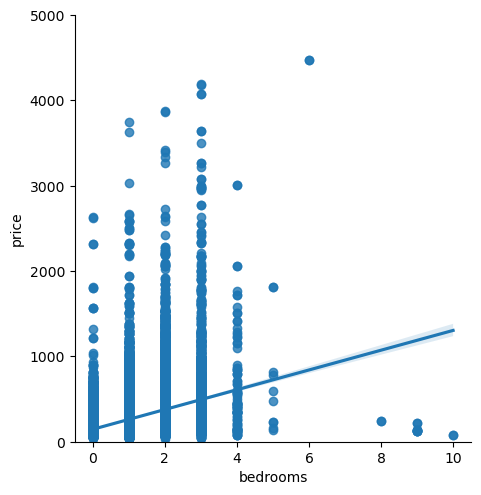

In [16]:
# Create a scatterplot for the "bedrooms" and "price" columns in seaborn
sns.lmplot(x = 'bedrooms', y = 'price', data = airbnb_sub)
# Limit the y-axis at 5000
plt.ylim(0, 5000)
plt.show()

#### Numerous blue dots represent individual data points, each correlating the price with the number of bedrooms.
#### A blue trend line indicates a slight positive correlation between the number of bedrooms and the price.
#### This type of chart will be interpreted better when using catplot.

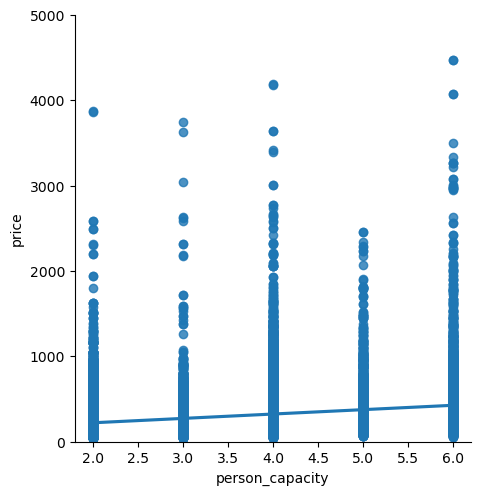

In [17]:
# Create a scatterplot for the "person_capacity" and "price" columns in seaborn
sns.lmplot(x = 'person_capacity', y = 'price', data = airbnb_sub)
# Limit the y-axis at 5000
plt.ylim(0, 5000)
plt.show()

#### Most data points are clustered at the lower end of the price axis, with a few outliers reaching higher prices.
#### The scatter plot does not show a clear trend or correlation between a person capacity and price.
#### This type of chart will be interpreted better when using catplot.

## 04. Create a pair plot of the entire data set

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

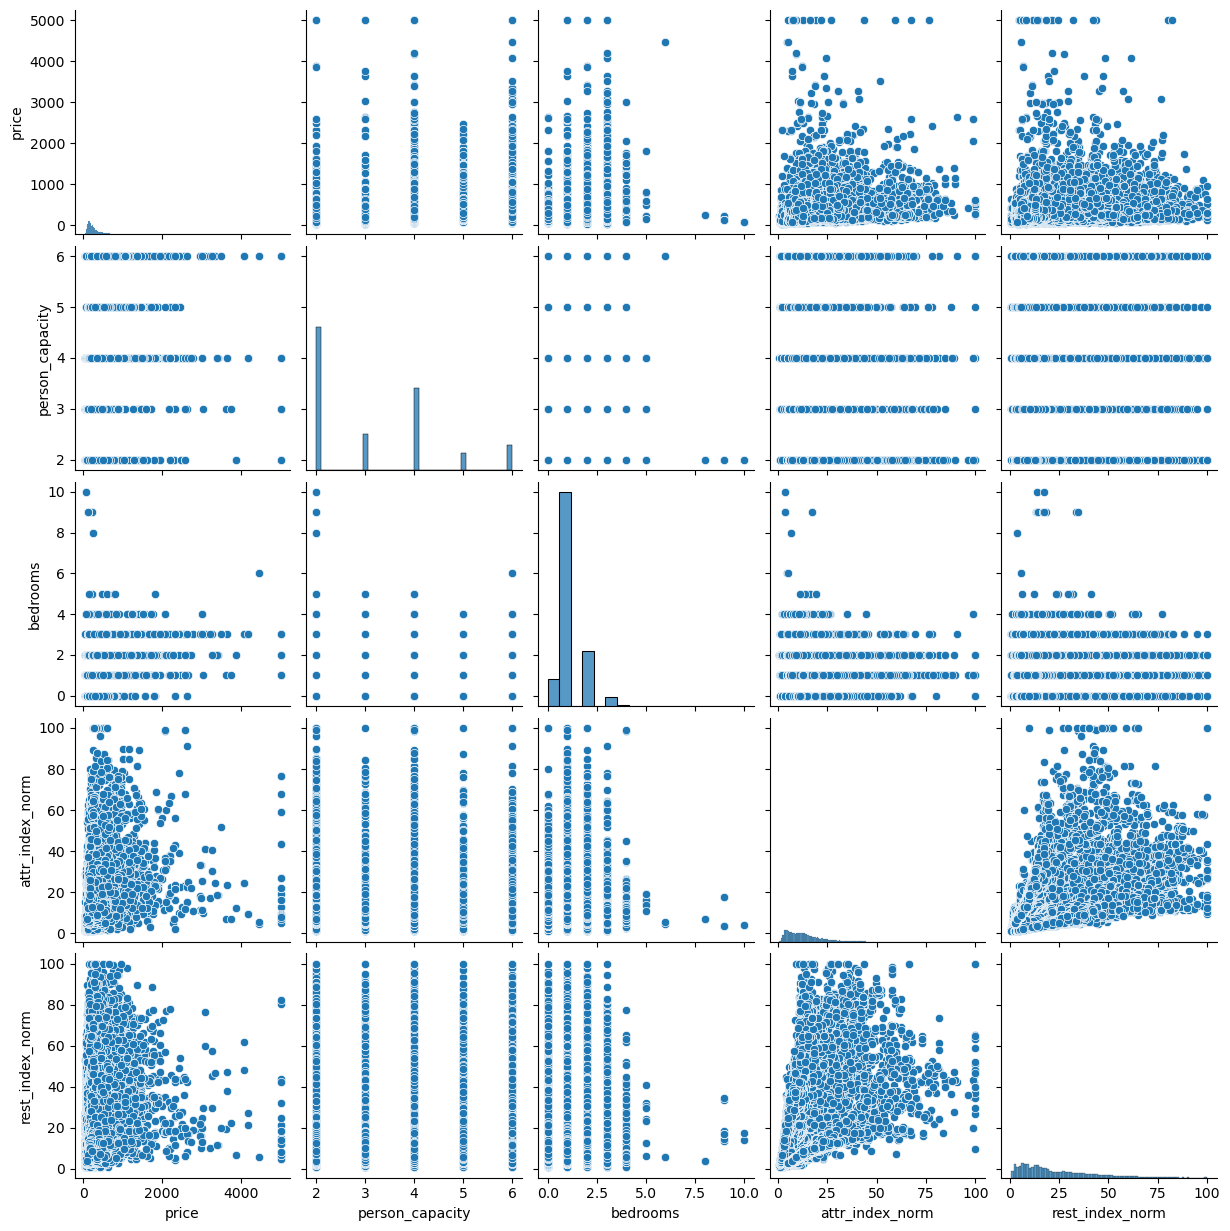

In [18]:
# Creating a pair plot for positive correlation variables
airbnb_positive = airbnb_sub.drop(columns = ['metro_dist', 'city_center_dist', 'cleanliness_rating', 'guest_satisfaction_overall'])
airbnb_positive['price'] = airbnb_positive['price'].clip(upper=5000)
pair_plot = sns.pairplot(airbnb_positive)

#### Even though it's hard to identify, I think there is a valid weak relationship between the attr_index_norm and the price, the same as the rest_index_norm and the price
#### Most of the price is under 5000 Euro and the rest_index, as well as the attr_index vary from 0 to 100. The higher the indices, the higher the price is

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

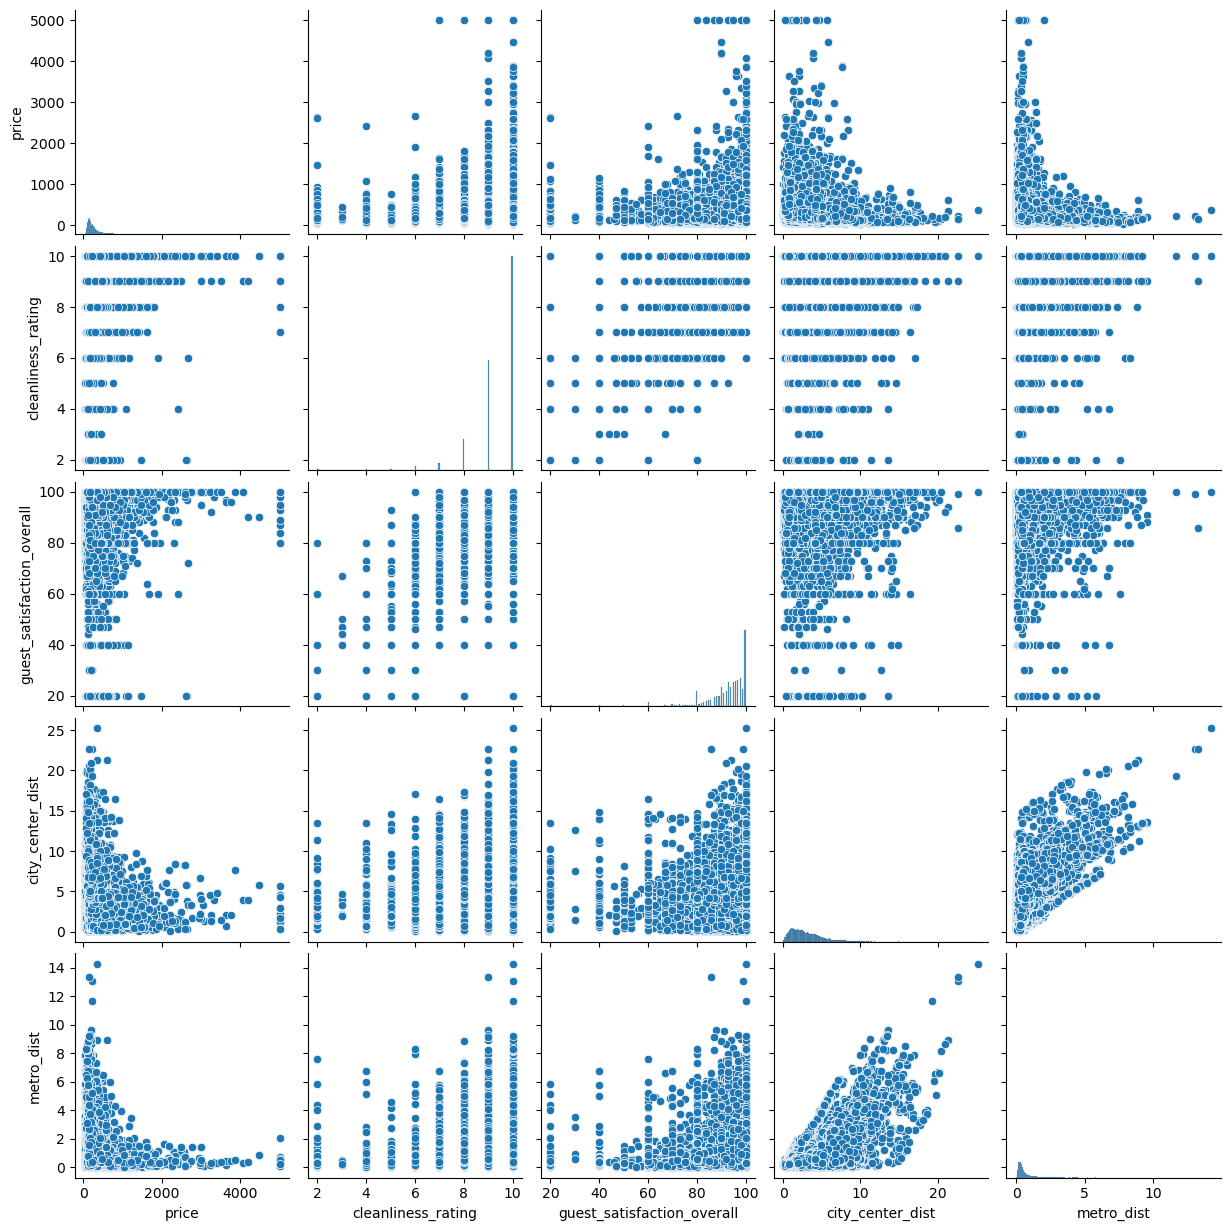

In [19]:
# Creating a pair plot for negative correlation variables
airbnb_negative = airbnb_sub.drop(columns = ['attr_index_norm', 'bedrooms', 'person_capacity', 'rest_index_norm'])
airbnb_negative['price'] = airbnb_negative['price'].clip(upper = 5000)
pair_plot = sns.pairplot(airbnb_negative)

#### I want to further analyze the relationship between price and metro_dist, city_center_dist and guest_satisfaction_overall because even though it's not show strongly on chart but there is still a weak signal of relationship between these variables.

## 05. Create a categorical plot and interpret the results

In [20]:
# Creating price category for categorical plot
airbnb_sub.loc[airbnb_sub['price'] < 150 , 'price_range'] = 'Low price'
airbnb_sub.loc[(airbnb_sub['price'] >= 150) & (airbnb_sub['price'] < 500), 'price_range'] = 'Middle price'
airbnb_sub.loc[airbnb_sub['price'] >= 500, 'price_range'] = 'High price'
airbnb_sub['price_range'].value_counts(dropna = False)

price_range
Middle price    33300
Low price       13221
High price       5186
Name: count, dtype: int64

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


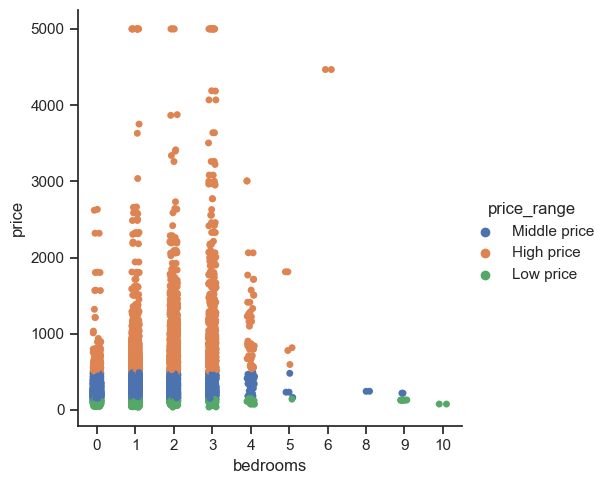

In [21]:
# Creating categorical plot with 'bedrooms'
airbnb_sub['price'] = airbnb_sub['price'].clip(upper=5000)
sns.set(style="ticks")
cat_plot_bedrooms = sns.catplot(x='bedrooms', y='price', hue='price_range', data=airbnb_sub)

#### We can only identify that listings with 0 - 4 bedrooms have various price ranges; we cannot identify the relationship between a number of bedrooms and the price.

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


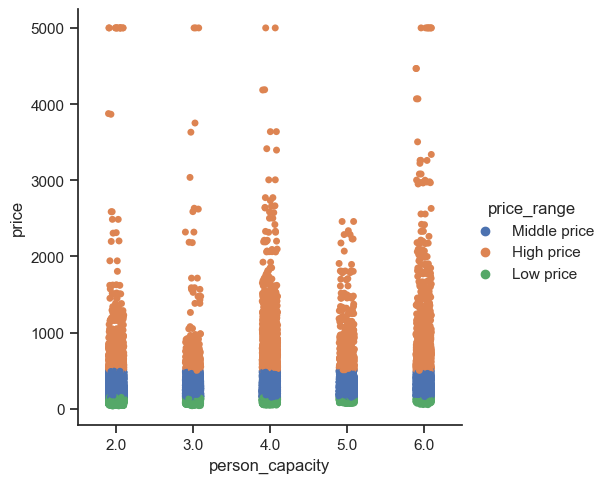

In [22]:
# Creating categorical plot with 'person_capacity'
airbnb_sub['price'] = airbnb_sub['price'].clip(upper=5000)
sns.set(style="ticks")
cat_plot_person = sns.catplot(x='person_capacity', y='price', hue='price_range', data=airbnb_sub)

#### We can only identify that each room capacity have various price range from low to high. There is no clear relationship between these two variables

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


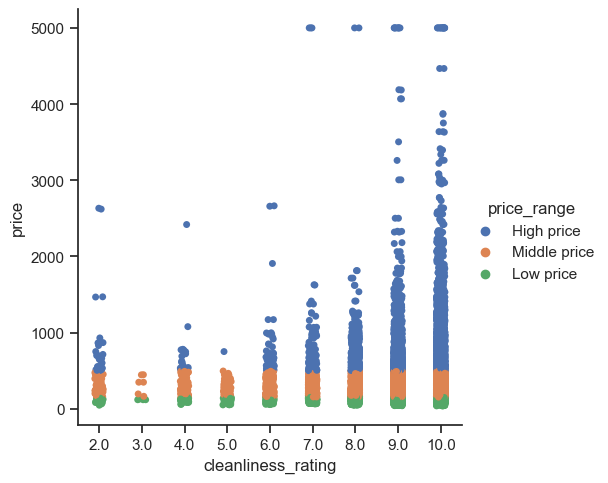

In [23]:
# Creating categorical plot with 'cleanliness_rating'
airbnb_sub['price'] = airbnb_sub['price'].clip(upper=5000)
sns.set(style="ticks")
cat_plot_clean = sns.catplot(x='cleanliness_rating', y='price', hue='price_range', data=airbnb_sub)

#### The data points are spread across all levels of cleanliness ratings, suggesting that properties with various cleanliness ratings can be found at all price points
#### Most data points cluster at the lower end of the price axis, indicating that most properties, regardless of cleanliness rating, are priced lower.
#### Based on this visualization, there does seem to be a weak positive correlation between cleanliness rating and price. Properties with high cleanliness ratings tend to have higher prices. However, this contradicts the result from the correlation heat map.

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


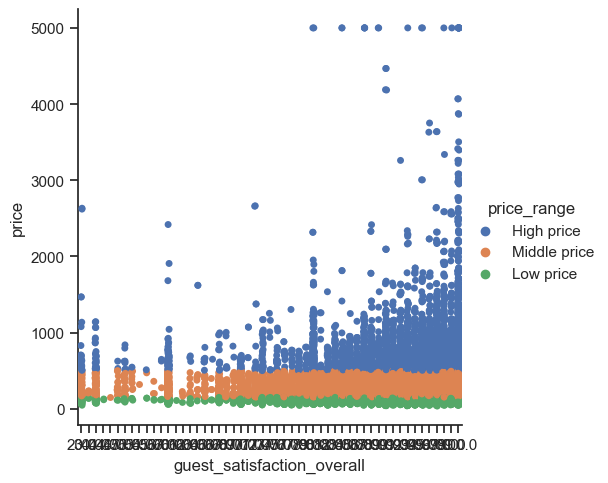

In [24]:
# Creating categorical plot with 'guest_satisfaction_overall'
airbnb_sub['price'] = airbnb_sub['price'].clip(upper=5000)
sns.set(style="ticks")
cat_plot_satisfaction = sns.catplot(x='guest_satisfaction_overall', y='price', hue='price_range', data=airbnb_sub)

#### Most data points, especially those in the low and middle-price range, are clustered at the lower end of both axes. This suggests that most properties with lower to moderate prices have corresponding guest satisfaction levels.
#### The high-price category shows instances of high satisfaction points may lead to higher price
#### There seems to be a weak positive correlation between price and guest satisfaction. However, this contradicts the result from the correlation heat map.

## 06. Answers to questions that can be based on the exploration conducted so far

#### Through all practices in this exercise, I only answered one question: How do the attraction index and restaurant index affect the price?
#### I can only say that the attraction index has a slightly positive relationship with the price. However, other factors also affect the price I need to look into, such as the restaurant index, distance from the metro station, and distance from the city center. 
#### I cannot answer the relationship between price and these indicators because their values are formatted as continuous numbers, causing difficulty when plotting them into a categorical plot. I need to take a further step to create a flag for these variables and then do further analyssi.


## 07. Define any hypotheses

#### The only hypothesis that can be defined at the moment:
#### Hypothesis: If a listing has a higher attraction index normalized point, the price of that listing is higher than other listings
#### Null hypothesis: If a listing has a higher attraction index normalized point, the price of that listing is not higher than other listings